This notebook is for visualizing the new TF-Modisco results for ZF11 from CTCF.

In [1]:
# Import necessary dependencies

%matplotlib inline
from __future__ import division;
from __future__ import print_function;
import numpy as np
import modisco
import sys
print (sys.version)
import os

TF-MoDISco is using the TensorFlow backend.


2.7.15 |Anaconda custom (64-bit)| (default, Oct 10 2018, 21:32:13) 
[GCC 7.3.0]


Save and print the results.

Metaclusters heatmap


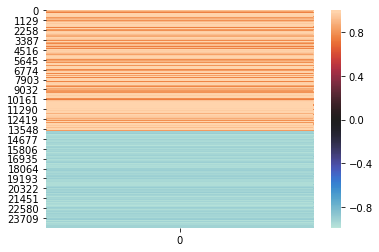

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 1431
Task 0 hypothetical scores:


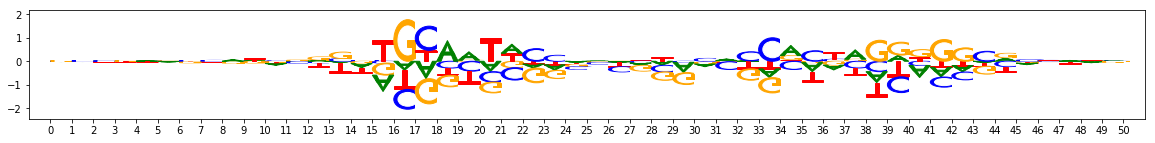

Task 0 actual importance scores:


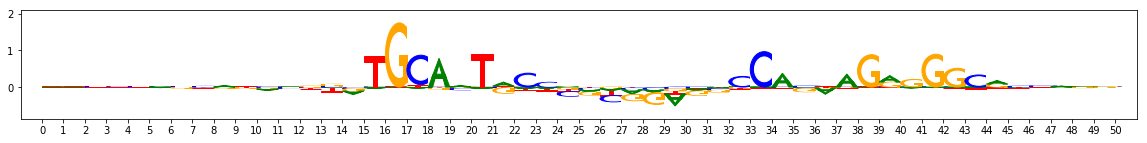

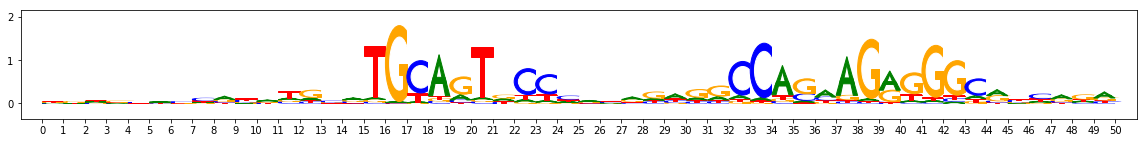

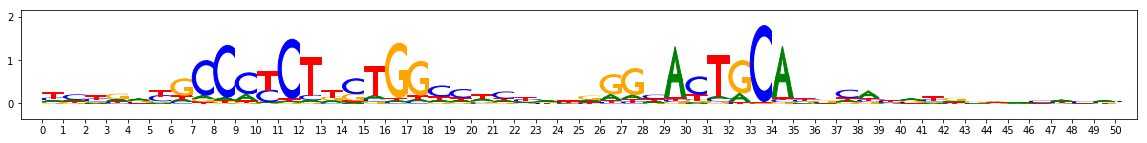

metacluster_0 pattern_1
total seqlets: 698
Task 0 hypothetical scores:


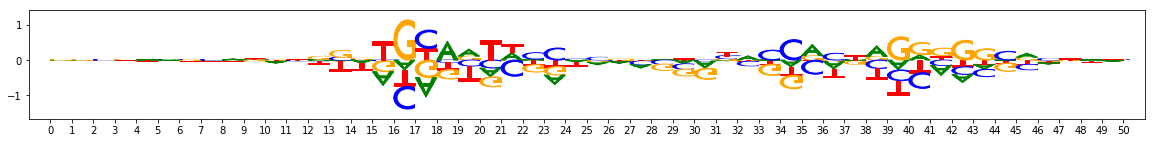

Task 0 actual importance scores:


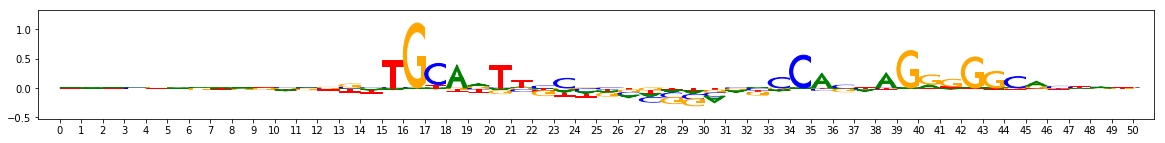

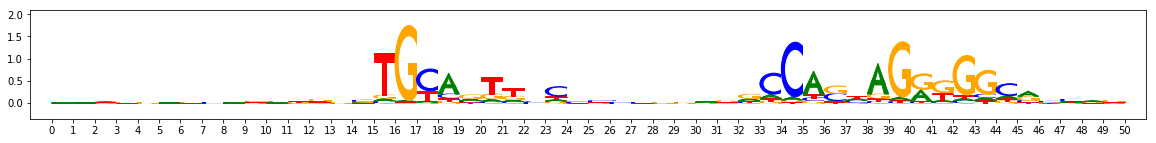

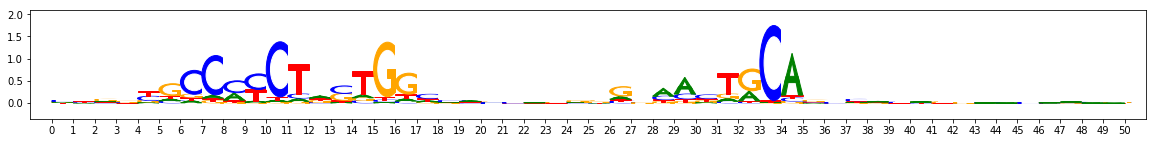

metacluster_0 pattern_2
total seqlets: 71
Task 0 hypothetical scores:


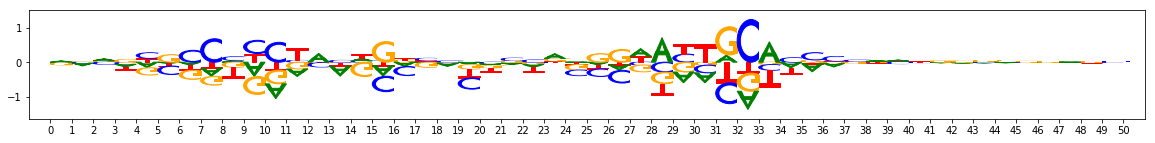

Task 0 actual importance scores:


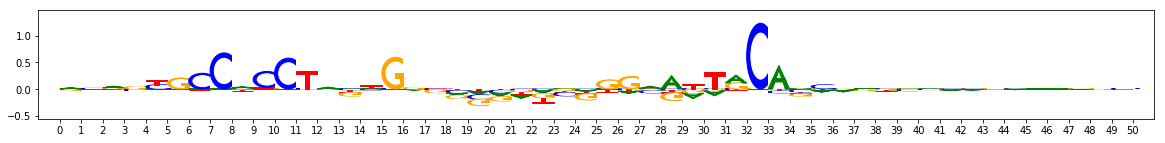

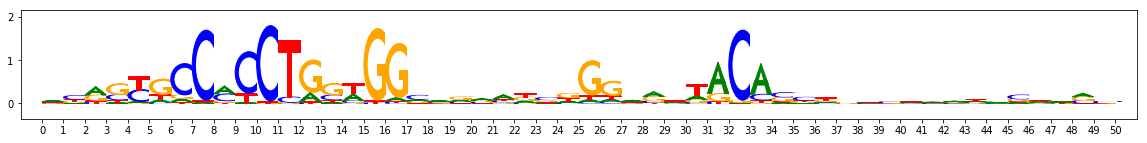

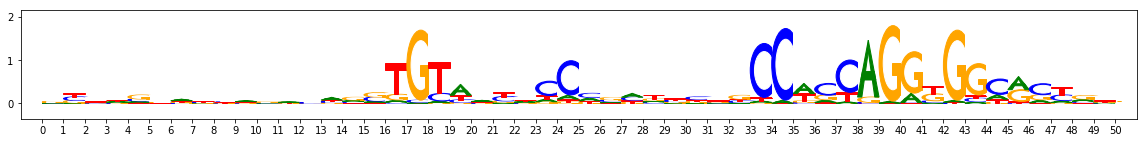

metacluster_0 pattern_3
total seqlets: 66
Task 0 hypothetical scores:


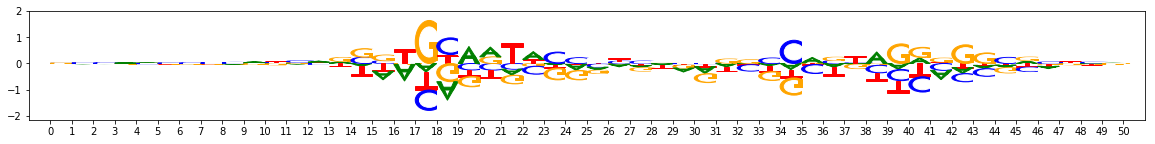

Task 0 actual importance scores:


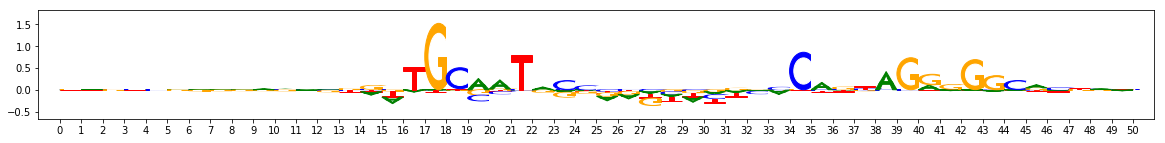

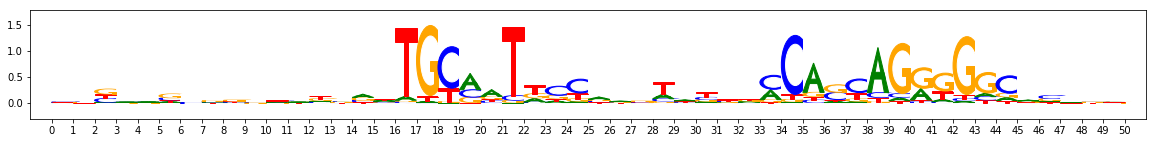

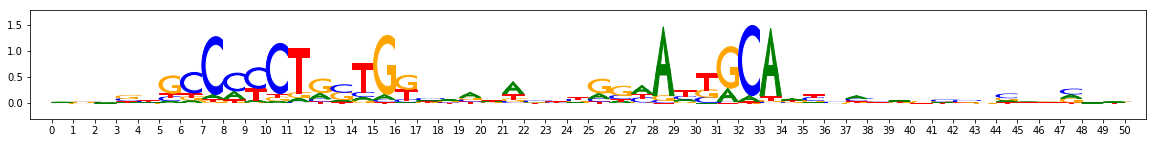

metacluster_0 pattern_4
total seqlets: 46
Task 0 hypothetical scores:


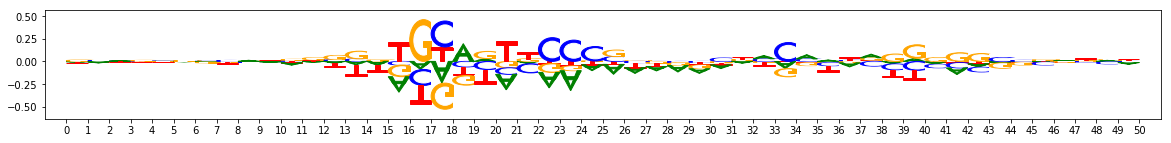

Task 0 actual importance scores:


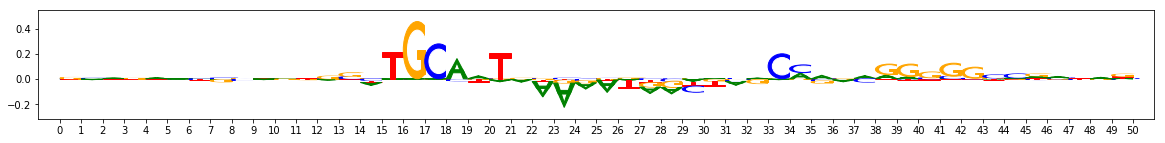

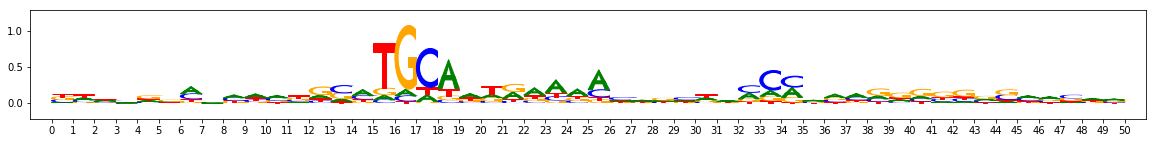

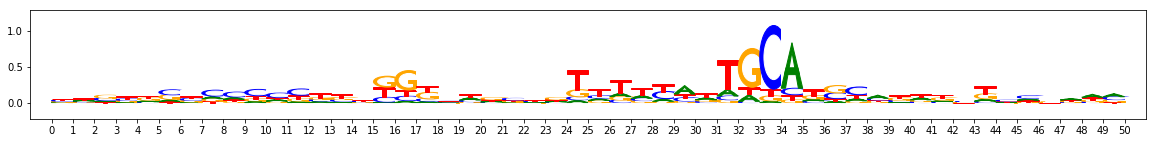

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 422
Task 0 hypothetical scores:


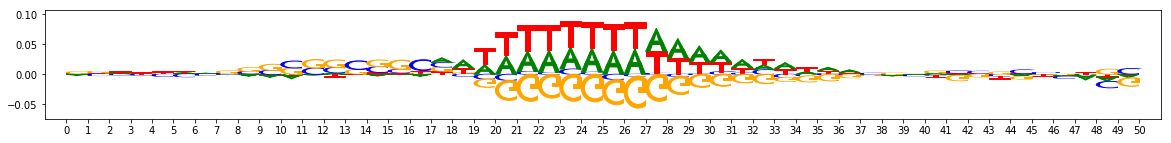

Task 0 actual importance scores:


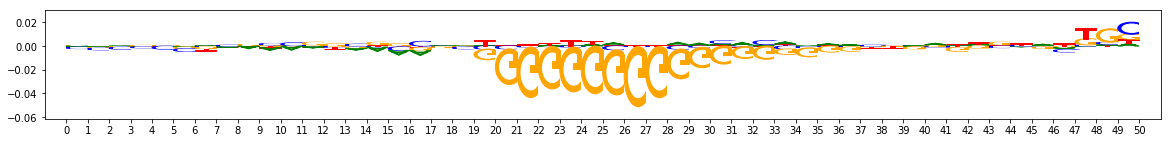

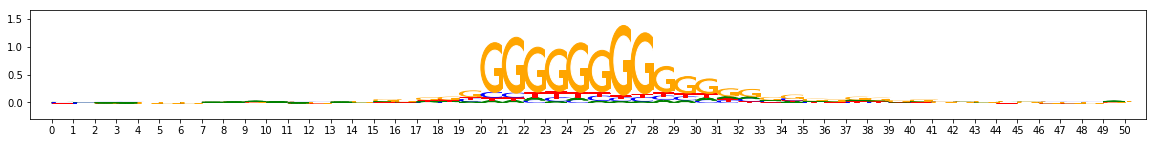

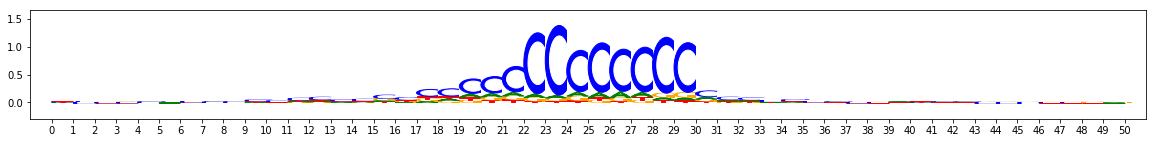

metacluster_1 pattern_1
total seqlets: 388
Task 0 hypothetical scores:


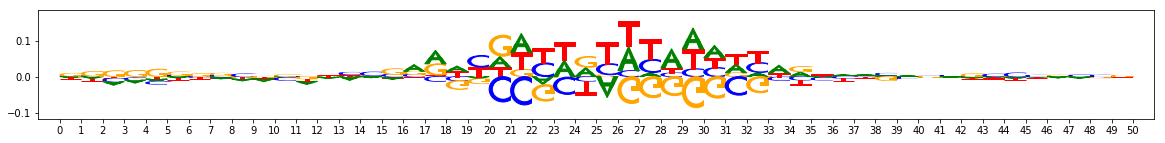

Task 0 actual importance scores:


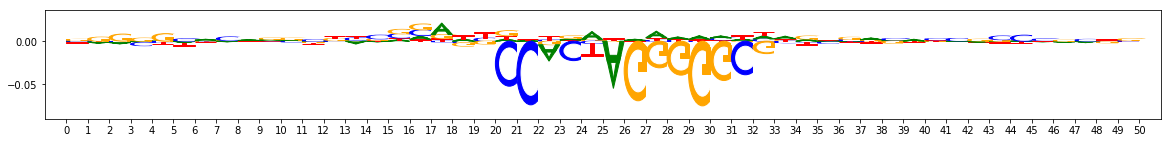

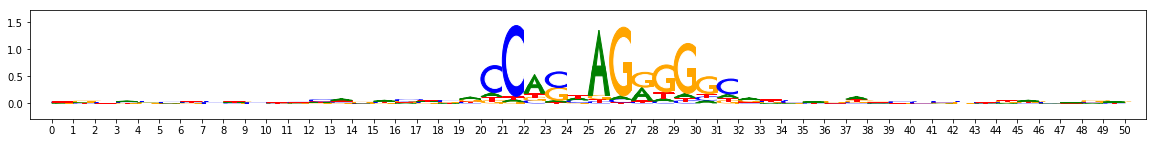

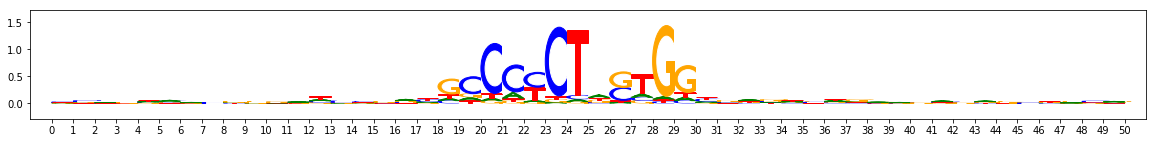

metacluster_1 pattern_2
total seqlets: 373
Task 0 hypothetical scores:


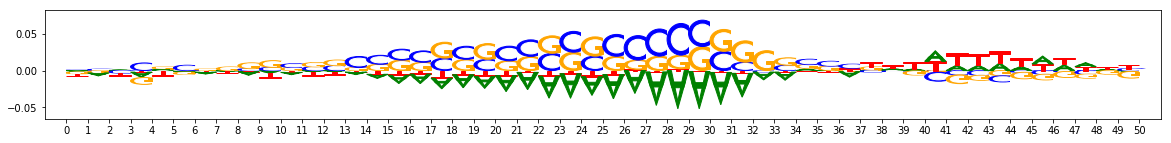

Task 0 actual importance scores:


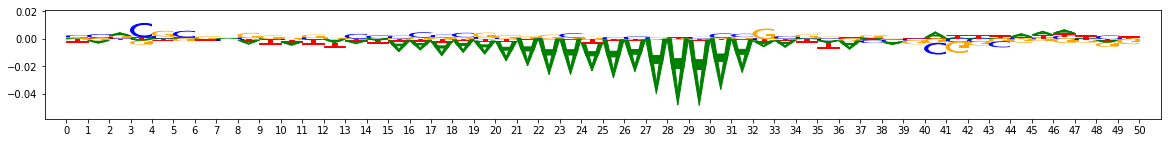

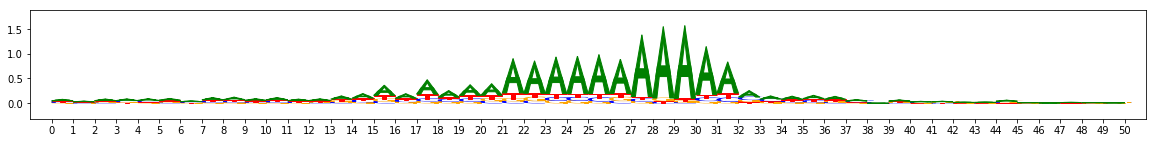

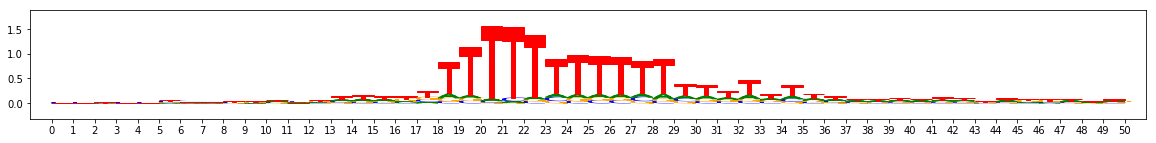

metacluster_1 pattern_3
total seqlets: 125
Task 0 hypothetical scores:


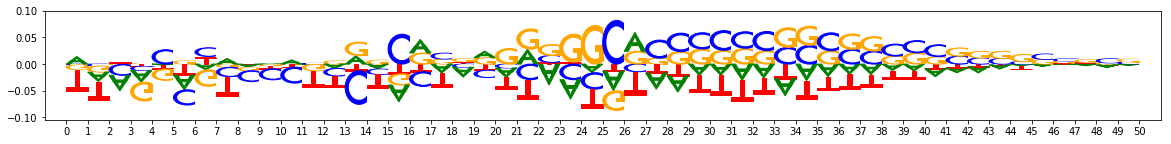

Task 0 actual importance scores:


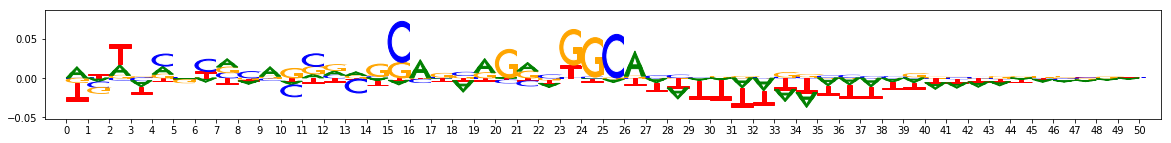

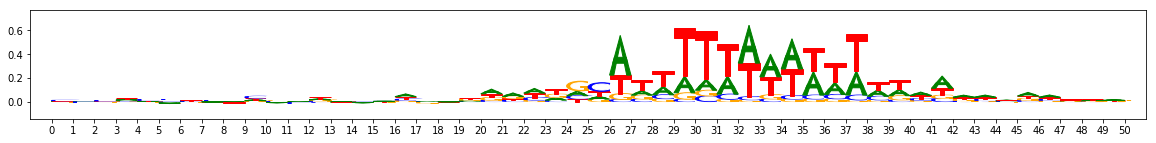

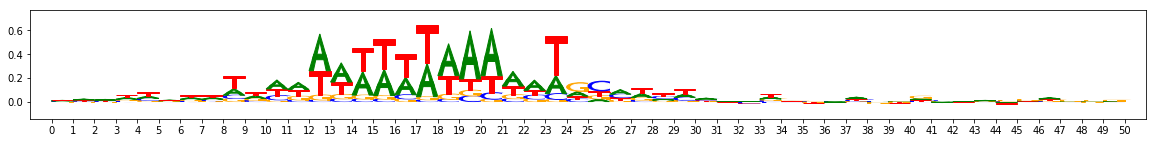

metacluster_1 pattern_4
total seqlets: 109
Task 0 hypothetical scores:


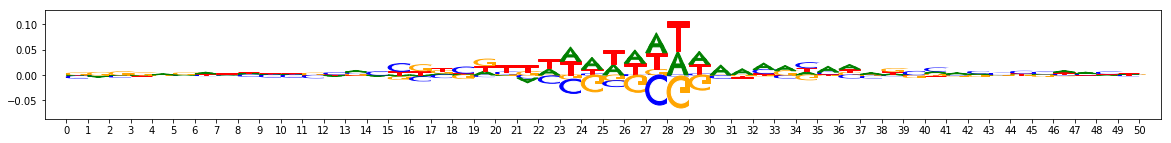

Task 0 actual importance scores:


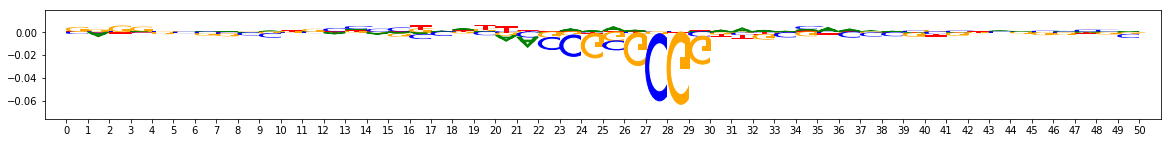

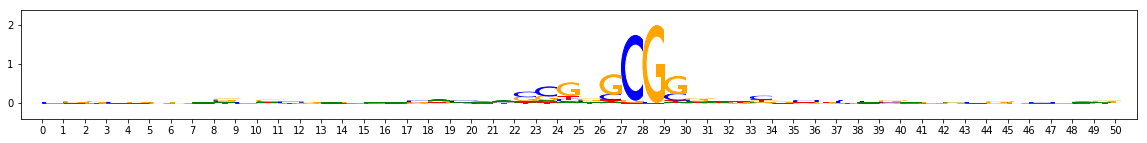

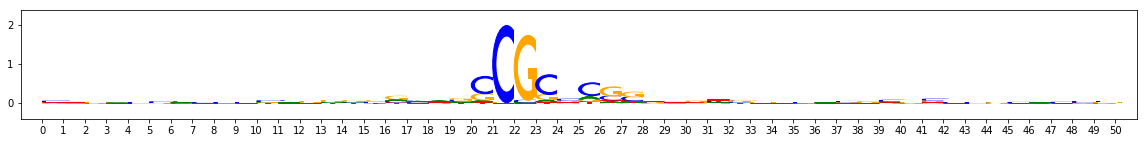

metacluster_1 pattern_5
total seqlets: 83
Task 0 hypothetical scores:


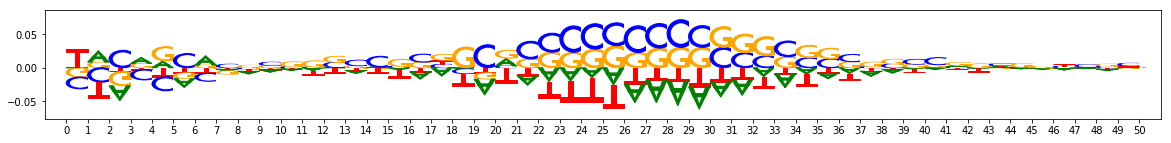

Task 0 actual importance scores:


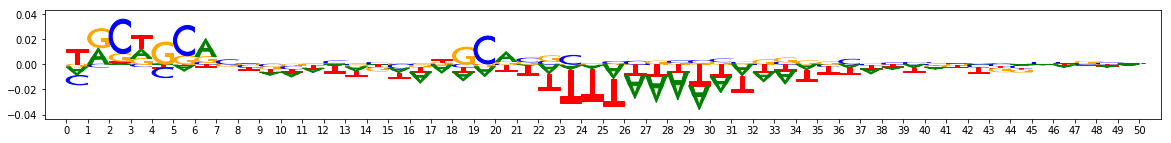

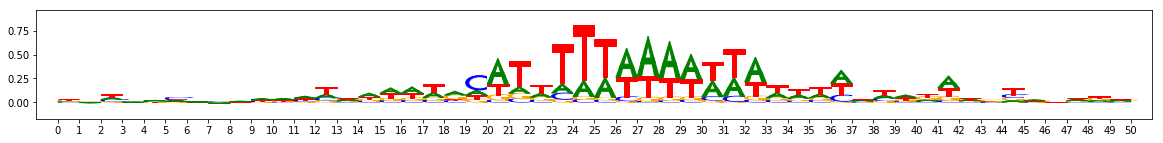

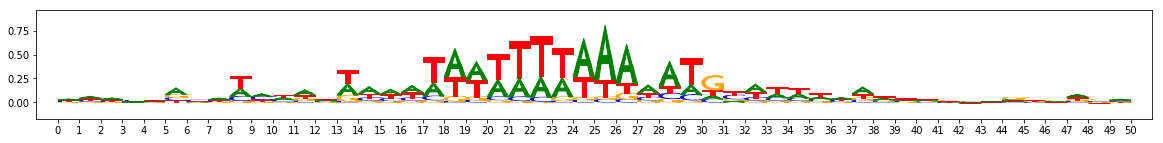

metacluster_1 pattern_6
total seqlets: 71
Task 0 hypothetical scores:


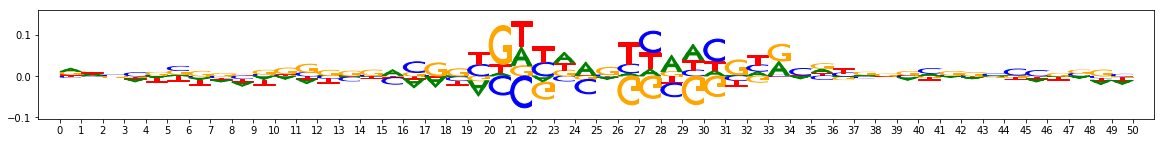

Task 0 actual importance scores:


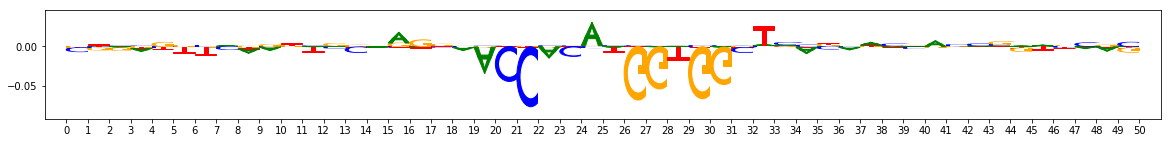

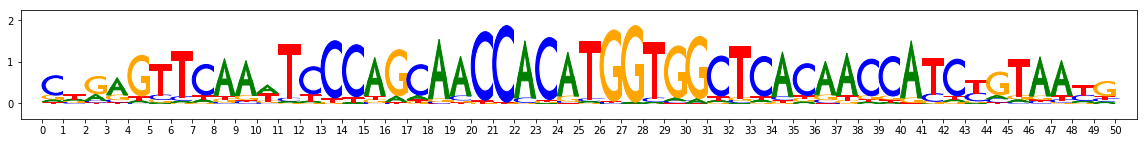

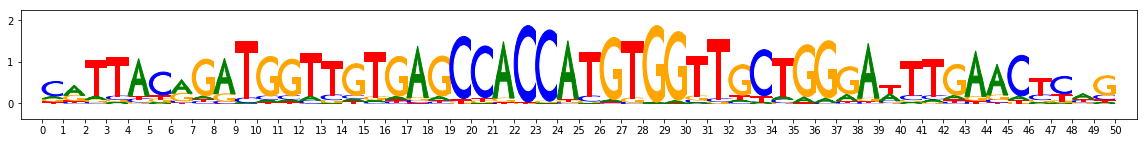

metacluster_1 pattern_7
total seqlets: 88
Task 0 hypothetical scores:


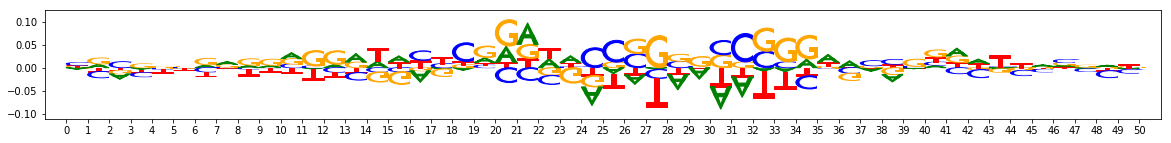

Task 0 actual importance scores:


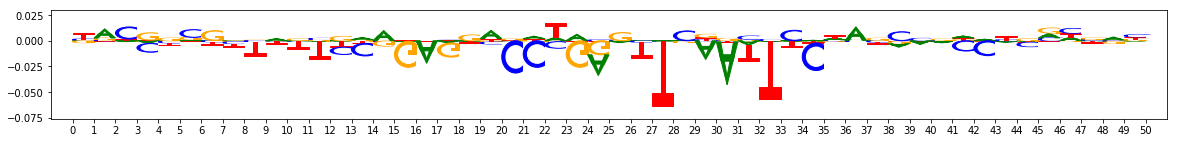

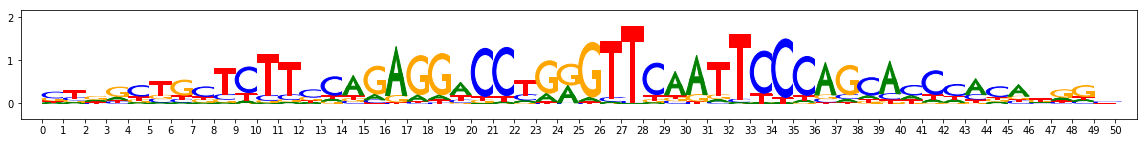

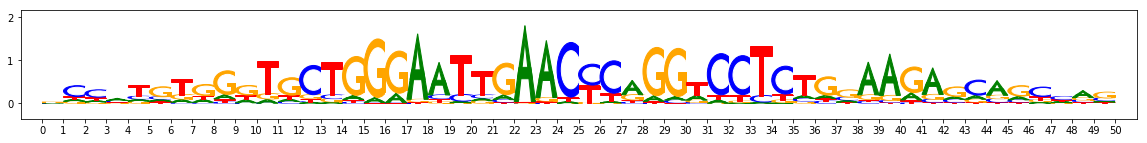

metacluster_1 pattern_8
total seqlets: 61
Task 0 hypothetical scores:


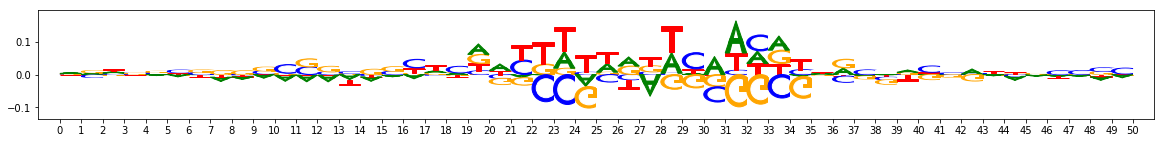

Task 0 actual importance scores:


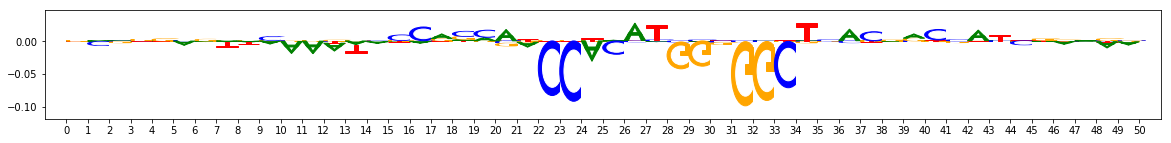

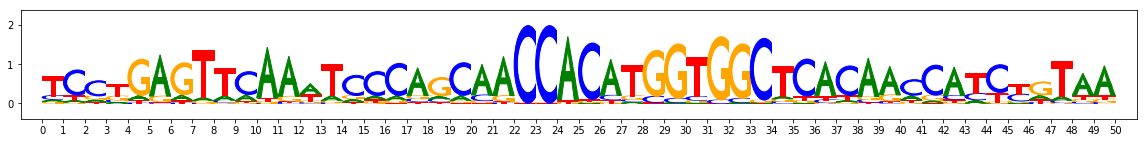

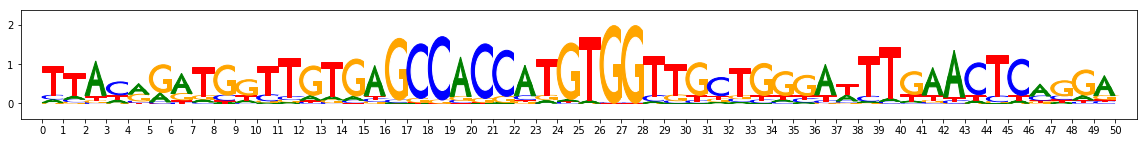

metacluster_1 pattern_9
total seqlets: 53
Task 0 hypothetical scores:


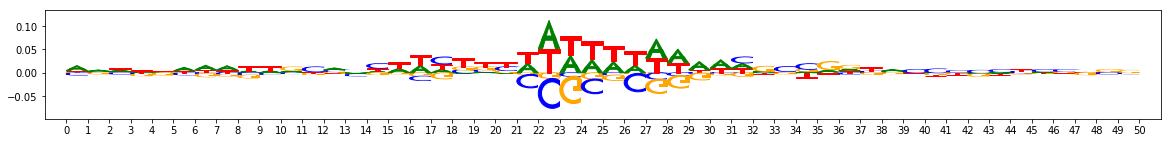

Task 0 actual importance scores:


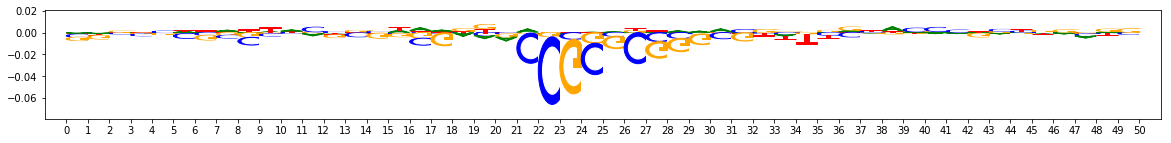

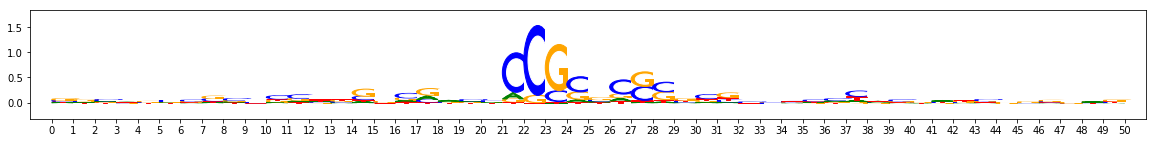

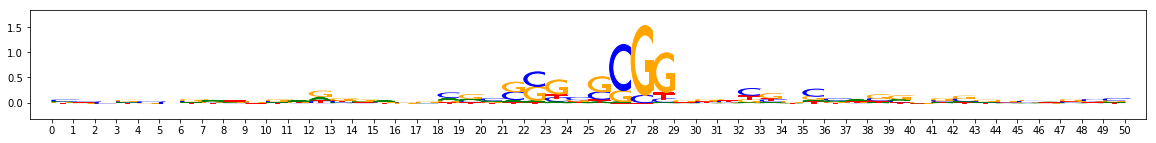

metacluster_1 pattern_10
total seqlets: 34
Task 0 hypothetical scores:


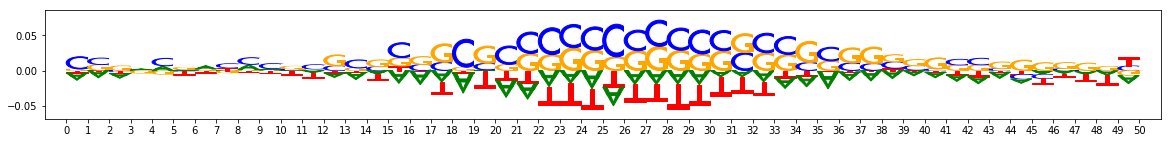

Task 0 actual importance scores:


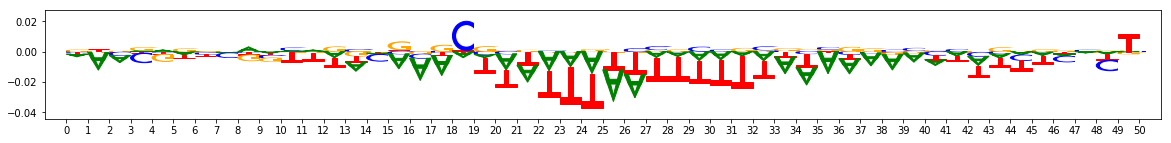

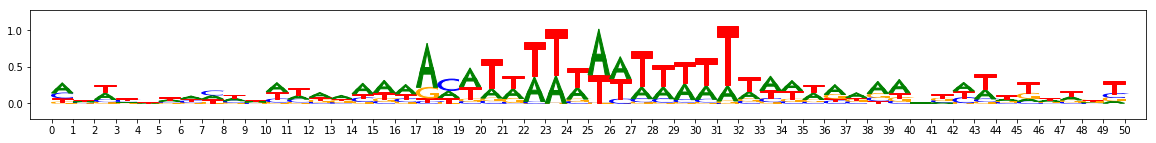

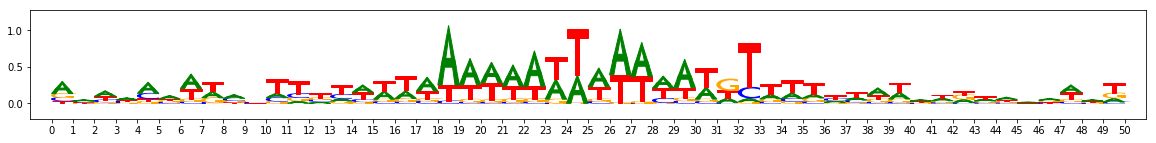

metacluster_1 pattern_11
total seqlets: 30
Task 0 hypothetical scores:


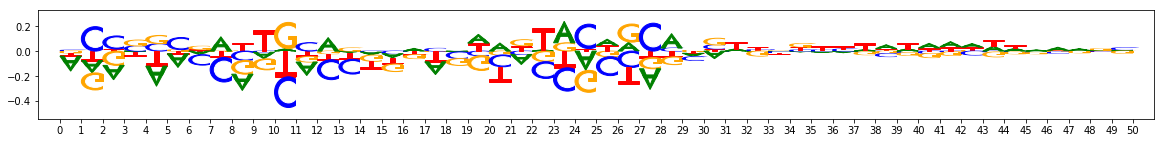

Task 0 actual importance scores:


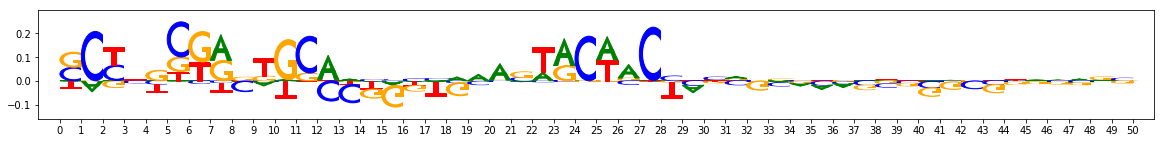

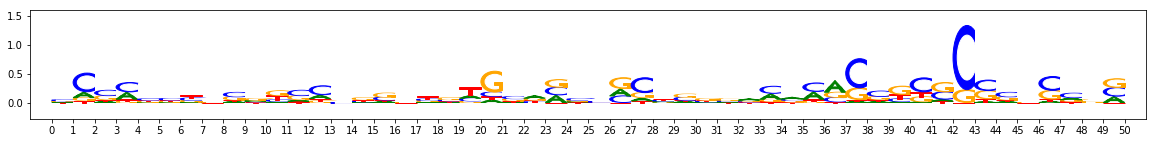

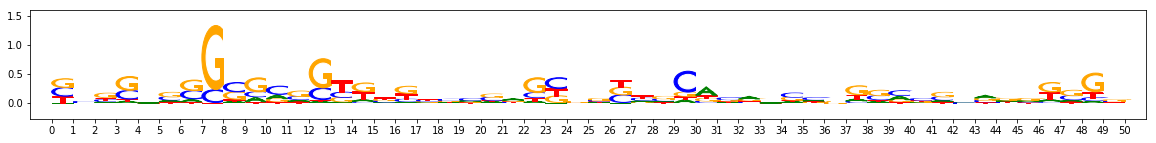

metacluster_1 pattern_12
total seqlets: 33
Task 0 hypothetical scores:


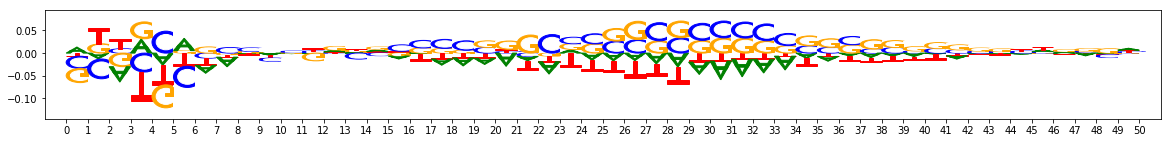

Task 0 actual importance scores:


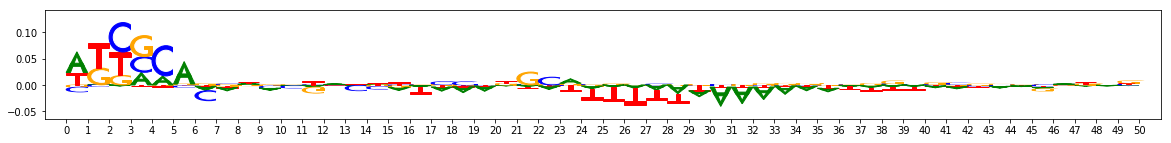

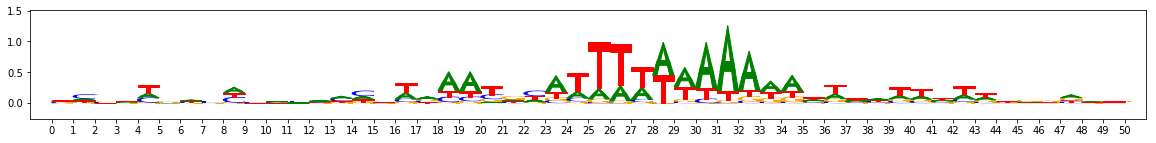

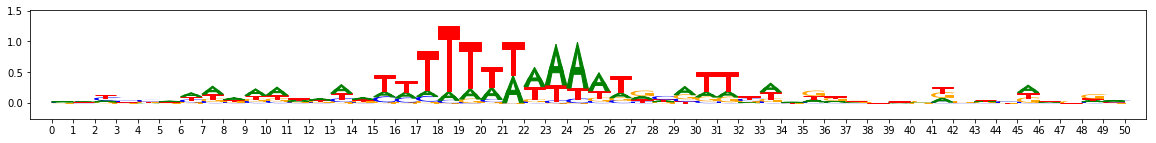

In [2]:
import h5py
import modisco.util
reload(modisco.util)

from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("CTCFZF11_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.29, 0.21, 0.21, 0.29])
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        
hdf5_results.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 1431
Task 0 hypothetical scores:


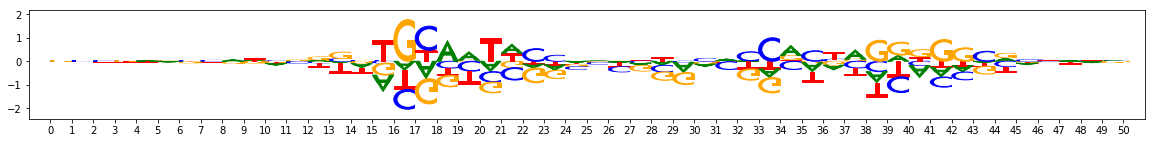

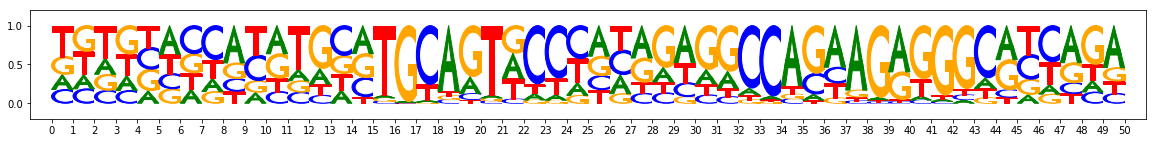

[[ -6.88906649e-03   7.74472332e-03   7.89213753e-03  -4.71856899e-03]
 [ -5.64317665e-03   1.17594764e-02   8.40647930e-03  -5.14734008e-03]
 [ -3.46433230e-03   1.55383122e-02  -9.87309559e-05  -6.56360807e-03]
 [ -1.57911974e-03   1.32275609e-03   1.61060087e-02  -1.91116897e-02]
 [  1.35110848e-02   2.68829943e-03  -2.16776020e-03  -2.26732496e-02]
 [ -2.49856922e-02  -3.36430093e-03   9.16996394e-03  -3.69048199e-03]
 [  3.89397882e-03   1.73112425e-02  -4.00447992e-02  -2.94488199e-02]
 [ -8.53876180e-03   3.80224740e-02  -1.65420962e-02  -2.41583737e-02]
 [  7.68353143e-02  -2.62268352e-02  -4.63614828e-02  -1.35502769e-02]
 [  1.93838617e-02   6.77289281e-03  -7.95897964e-02   9.69112382e-02]
 [ -7.94221152e-02  -1.81499988e-02  -3.31308797e-02  -4.19254199e-02]
 [ -1.76865818e-02  -6.42564996e-02   3.73827596e-02   1.57775045e-02]
 [  6.54481318e-02  -6.48670781e-02   1.20801644e-01  -1.67749777e-01]
 [ -6.88808184e-02   1.16344498e-01   2.74383979e-01  -4.50980367e-01]
 [ -1.

In [3]:
# Get the PFM with the most seqlets

hdf5_results = h5py.File("CTCFZF11_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    if metacluster_name != "metacluster_0":
        continue
    pattern_name = all_pattern_names[0]
    print(metacluster_name, pattern_name)
    all_patterns.append((metacluster_name, pattern_name))
    pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    background = np.array([0.28, 0.21, 0.21, 0.28])
    print("Task 0 hypothetical scores:")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
    viz_sequence.plot_weights(pattern["sequence"]["fwd"])
    print(np.array(pattern["task0_hypothetical_contribs"]["fwd"]))
    print(np.array(pattern["sequence"]["fwd"]))
        
hdf5_results.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_1
total seqlets: 698
Task 0 hypothetical scores:


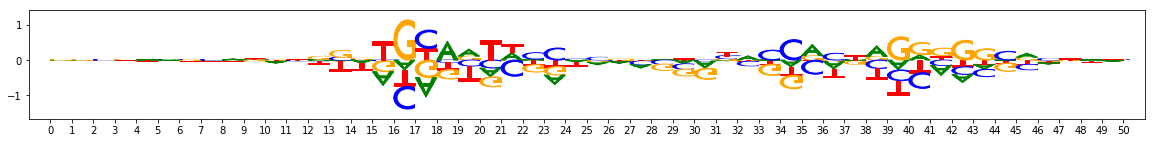

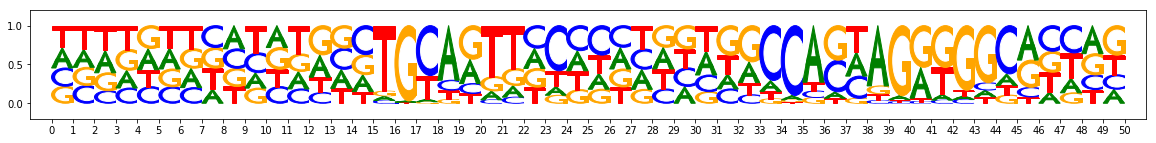

[[-6.53362974e-03  2.63799794e-03  9.18255727e-03 -5.67423947e-03]
 [-7.37372987e-03  3.90705774e-03  8.26871775e-03 -3.97923694e-04]
 [-1.76770517e-03  5.52192109e-03  3.79734160e-03 -3.38672503e-03]
 [-4.21575299e-04 -1.26858947e-04  7.10892030e-03 -8.71543839e-03]
 [ 1.07768903e-02  2.11690718e-03 -2.92153817e-03 -1.23442633e-02]
 [-8.18049480e-03  4.66172552e-03  3.84750405e-03 -4.76769062e-03]
 [ 6.21899986e-04  7.48081647e-03 -1.79571065e-02 -2.09834565e-02]
 [-1.36182913e-02  1.57478686e-02 -1.91953530e-03 -2.15823369e-02]
 [ 3.22024163e-02 -3.77173643e-03 -9.23607237e-03 -1.17867289e-02]
 [ 1.28691841e-02  1.04640963e-02 -2.40356518e-02  4.58924762e-02]
 [-5.21449445e-02  5.17133002e-03 -9.87151708e-03 -2.76513426e-02]
 [-8.48646868e-03 -1.36375496e-02  9.39232403e-03  2.33817374e-02]
 [ 2.47366331e-02 -2.26234868e-02  7.81196653e-02 -8.02663382e-02]
 [-3.21452091e-02  8.05574942e-02  1.91398669e-01 -2.63623043e-01]
 [-9.35723153e-02  2.32372870e-02  2.64970467e-02 -1.88503905e

In [3]:
# Get the PFM with the alternative spacing

hdf5_results = h5py.File("/CTCFZF11_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    if metacluster_name != "metacluster_0":
        continue
    pattern_name = all_pattern_names[1]
    print(metacluster_name, pattern_name)
    all_patterns.append((metacluster_name, pattern_name))
    pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    background = np.array([0.29, 0.21, 0.21, 0.29])
    print("Task 0 hypothetical scores:")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
    viz_sequence.plot_weights(pattern["sequence"]["fwd"])
    print(np.array(pattern["task0_hypothetical_contribs"]["fwd"]))
    print(np.array(pattern["sequence"]["fwd"]))
        
hdf5_results.close()